# The Breit-Wigner parameterization

This programm computes the Breit-Wigner propagator $A(s)$ for a single, isolated and narrow resonance with a smooth background. To do so, we only look at two body decays and assume that the resonance is observed in channel a, that is coupled to a set of channels b = 1,2,3,... .

In [30]:
#import some usefull libraries:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, HBox, Layout, VBox
from IPython.display import display,clear_output
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime
import cmath
from colorspacious import cspace_convert
import matplotlib.colors as col
import seaborn as sns
from matplotlib.pyplot import figure
import os
if not os.path.exists("images"):
    os.mkdir("images")
np.seterr(divide='ignore', invalid='ignore')
print('start programm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

start programm:(09:50:36.610454)


Please enter your data (it can be changed later):

In [31]:
#Breit-Wigner mass
mass = 980
#proportionality factor of the numerator function:
alpha = 1

#orbital angular momentum of channel a:
la = 0

#masses of the decay products in channel a (two-body decay):
m1a = 139.57061
m2a = 139.57061

#coupling factor of channel a:
gFaka = 2000

#number of b channels that the resonance is coupled to:
number = 1

#orbital angular momentum of the channels b, insert them in the following manner: lb=[l_1,l_2,...,l_number]:
lb = [0]

#coupling factor of the channels b, [g_1,g_2,...,g_number]:
gFakb = [5000]

#masses of the decay products in the channels b, use e.g. m1b = [m1_1,m1_2,...,m1_number]:
m1b = [493.677]
m2b = [493.677]

In [32]:
xrange_left = 0
xrange_right = 1300

limitL = xrange_left**2
limitU = xrange_right**2

#create a number of x values
imag = 0
dev_x = np.linspace(limitL,limitU,num=200)
listx = []
for i in range(0,len(dev_x)):
    listx.append(complex(dev_x[i],imag)) 

Calculate the momentum of particles in their center-of-momentum frame:

$ q_i = \frac{\lambda^{1/2}(s,m_{1,i}^{2},m_{2,i}^{2})}{2 \sqrt{s}} $
 with <br>  $\lambda (s,m_{1,i}^{2},m_{2,i}^{2}) = s^2 + m_{1,i}^{4} + m_{2,i}^{4} - 2sm_{1,i}^{2} - 2m_{1,i}^{2}m_{2,i}^{2}-2m_{2,i}^{2}s = (s-(m_{1,i}+m_{2,i})^2) \cdot (s-(m_{1,i}-m_{2,i})^2)$, $i \in \{ a,b \}$<br>
so that we get for $m_{1,i}=m_{2,i}$:
$$q_i=\sqrt{\frac{s}{4}-m_{1,i}^2}$$

In [33]:
def q(s, m1, m2):
    return (np.sqrt(s**2 + m1**4 + m2**4 - 2.*s*m1**2 - 2.*m1**2*m2**2 - 2.*m2**2*s))/(2*np.sqrt(s))  

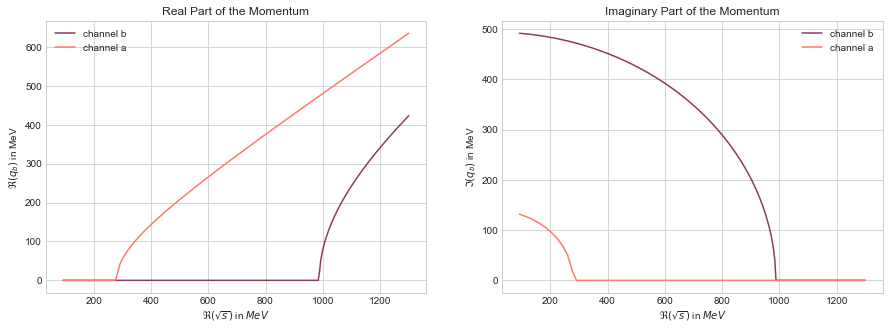

In [34]:
funcA = []
funcB = []
funcC = []
funcD = []
for j in range(0,len(listx)):
    funcA.append(q(listx[j],m1b[0],m2b[0]).real) 
    funcB.append(q(listx[j],m1b[0],m2b[0]).imag)
    funcC.append(q(listx[j],m1a,m2a).real)
    funcD.append(q(listx[j],m1a,m2a).imag)
    
plt.style.use('seaborn-whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.plot(np.sqrt(listx).real, funcA, color = '#8B3A62', label = "channel b")
ax1.plot(np.sqrt(listx).real, funcC, color = '#FF796C', label = "channel a")
ax2.plot(np.sqrt(listx).real, funcB, color = '#8B3A62', label = "channel b")
ax2.plot(np.sqrt(listx).real, funcD, color = '#FF796C', label = "channel a")

ax1.set_title('Real Part of the Momentum')
ax2.set_title('Imaginary Part of the Momentum')

ax1.set_xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')
ax2.set_xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')

ax1.set_ylabel(r'$\Re{(q_b)}$ in MeV')
ax2.set_ylabel(r'$\Im{(q_b)}$ in MeV')

ax1.legend()
ax2.legend()

plt.show()

Calculate the Blatt Weisskopf form factors $F_l(z)$:
$$F_0^2 = 1$$
$$F_1^2(z) = \frac{1}{1+z^2}$$
$$F_2^2(z) = \frac{1}{9+3z^2+z^4}$$

In [35]:
#Blatt-Weisskopf form factors:
def weiss(z,la):
    if la != 0:
        if la ==1:
            return np.sqrt(1/(1+z**2))
        else:
            return np.sqrt(1/(9+ 3*z**2 + z**4))
    else:
        return 1


Calculate the factor $n_i(s)$ of the numerator function:

$$n_i(s) = \left(\frac{q_i}{q_0}\right)^{l_i} F_{l_i}\left(\frac{q_i}{q_0}\right)$$

This factor only becomes important for waves with non zero angular momentum $l_i$.

In [36]:
def smallnum(s,la,m1,m2):
    q0=1;  #the breakup momentum which you get when m=m_BW you are on resonance 
    return (q(s,m1,m2)/q0)**la*weiss(q(s,m1,m2)/q0,la)

Calculate factor $\rho_b(s)$ that is related to the two body phase space and needed to calculate the parametrization width:

$$\rho_i (s) = \frac{q_i}{16 \pi \sqrt{s}}$$

In [37]:
def rho(s,m1,m2):
    return 2.*q(s,m1,m2)/(16.*np.pi*np.sqrt(s))

def rhoA(s,m1a,m2a):
    return 2.*q(s,m1a,m2a)/(16.*np.pi*np.sqrt(s))
def rhoB(s,m1b,m2b):
    return 2.*q(s,m1b,m2b)/(16.*np.pi*np.sqrt(s))

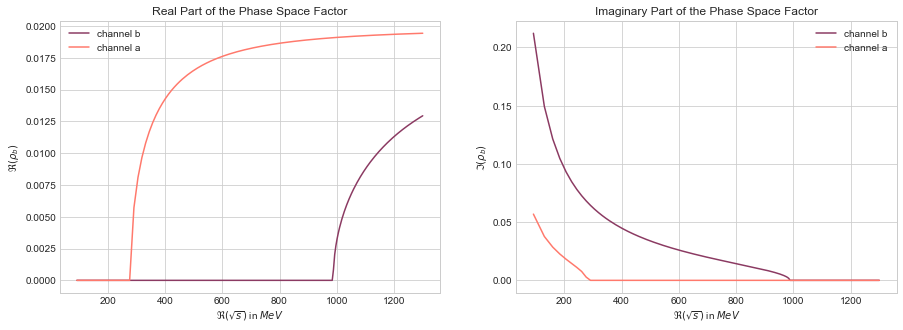

In [38]:
funcA_1 = []
funcB_1 = []
funcC_1 = []
funcD_1 = []
for j in range(0,len(listx)):
    funcA_1.append(rho(listx[j],m1b[0],m2b[0]).real) 
    funcB_1.append(rho(listx[j],m1b[0],m2b[0]).imag)
    funcC_1.append(rho(listx[j],m1a,m2a).real)
    funcD_1.append(rho(listx[j],m1a,m2a).imag)
plt.style.use('seaborn-whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.plot(np.sqrt(listx).real, funcA_1, color = '#8B3A62', label = "channel b")
ax1.plot(np.sqrt(listx).real, funcC_1, color = '#FF796C', label = "channel a")
ax2.plot(np.sqrt(listx).real, funcB_1, color = '#8B3A62', label = "channel b")
ax2.plot(np.sqrt(listx).real, funcD_1, color = '#FF796C', label = "channel a")

ax1.set_title('Real Part of the Phase Space Factor')
ax2.set_title('Imaginary Part of the Phase Space Factor')

ax1.set_xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')
ax2.set_xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')

ax1.set_ylabel(r'$\Re{(\rho_b)}$ ')
ax2.set_ylabel(r'$\Im{(\rho_b)}$ ')

ax1.legend()
ax2.legend()

plt.show()

Calculate the width of the propagator:

$$\Gamma (s) =  \sum_{i=a,b} g_i^2 \rho_i(s)n_i^2(s)$$

The sum runs over all open channels i.

In [39]:
def width(s,mass,lb,m1,m2,gFak):
    sum= gFak[0]**2*rhoA(s,m1[0],m2[0])*smallnum(s,lb[0],m1[0],m2[0])**2+gFak[1]**2*rhoB(s,m1[1],m2[1])*smallnum(s,lb[1],m1[1],m2[1])**2
    return sum
   #sum = 0.
   #for i in range(0,len(gFak)):
   #    sum += gFak[i]**2*rho(s,m1[i],m2[i])*smallnum(s,lb[i],m1[i],m2[i])**2
   #return sum

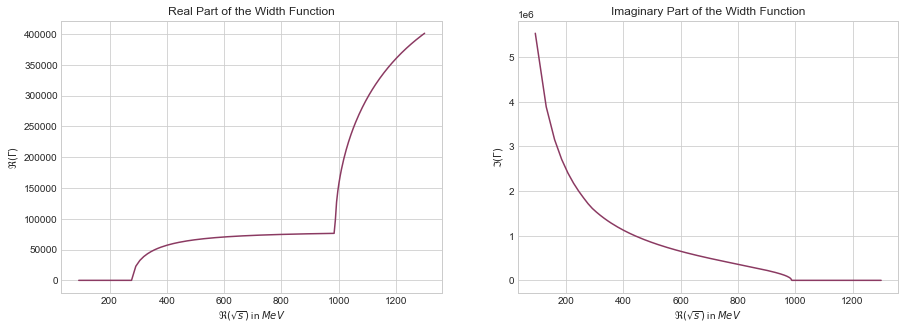

In [40]:
funcA_2 = []
funcB_2 = []
for j in range(0,len(listx)):
    funcA_2.append(width(listx[j],mass,[la] + lb,[m1a] + m1b,[m2a] + m2b,[gFaka] + gFakb).real) 
    funcB_2.append(width(listx[j],mass,[la] + lb,[m1a] + m1b,[m2a] + m2b,[gFaka] + gFakb).imag)
plt.style.use('seaborn-whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.plot(np.sqrt(listx).real, funcA_2, color = '#8B3A62')
ax2.plot(np.sqrt(listx).real, funcB_2, color = '#8B3A62')

ax1.set_title('Real Part of the Width Function')
ax2.set_title('Imaginary Part of the Width Function')

ax1.set_xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')
ax2.set_xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')

ax1.set_ylabel(r'$\Re{(\Gamma)}$ ')
ax2.set_ylabel(r'$\Im{(\Gamma)}$ ')
plt.show()

Calculate the Numerator function:
$$N_a (s) = \alpha g_a n_a(s) $$

$g_a$ is the pole coupling factor and characterizes the transition strength of the resonance to the channel a.
The differentiation between alpha and the coupling factor $g_a$ is not necessary. These parameters are often summarized to a factor $\delta = \alpha \cdot g_a$.
Any variation of both parameters can be expressed as a different variation of either one of them.


In [41]:
#numerator function
def num(s,alpha,la,m1,m2,gFak):
    return alpha*gFak*smallnum(s,la,m1,m2)

Use the functions defined above to calculate the propagator:
$$A(s) = \frac{N_a(s)}{M_{BW}^2-s-i\Gamma(s)}$$

In [42]:
def amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    gFak = [gFaka] + gFakb
    m1 = [m1a] + m1b
    m2 = [m2a] + m2b
    li = [la] + lb
    return num(s,alpha,la,m1a,m2a,gFaka) /  (mass**2-s-1j*(width(s,mass,li,m1,m2,gFak)))

#amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)
def amp_test(s):
    return 1/(mass*mass-s)


In [43]:
def amp_b(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    gFak = [gFaka] + gFakb
    m1 = [m1a] + m1b
    m2 = [m2a] + m2b
    li = [la] + lb
    return num(s,alpha,lb[0],m1b[0],m2b[0],gFakb[0]) /  (mass**2-s-1j*(width(s,mass,li,m1,m2,gFak)))

Create a 2D-Plot of the absolute value of the propagator:

Display the Breit-Wigner lineshape in the mass spectrum of channel a:

In [44]:
print('start diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

#choose an imaginary part, that you want to plot your function for (the absolute value of the amplitude is a family of functions depending on the imaginary part of s):
imag = 0

#plot ranges:
#insert ranges for sqrt(s) (of the x axis):
xaxisL = 1
xaxisU = 1500

#calculate the needed ranges for s:
lowlim = xaxisL**2
uplim = xaxisU**2


sReal=np.linspace(lowlim,uplim,num=800)

def newF(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    list = []
    for i in sReal:
        s = complex(i,imag)
        res = abs(amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))**2*rho(s,m1a,m2a).real
        list.append(res)
    return list

def integrate(la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    #number of grid points:
    n = 110
    #size of one intervall:
    h = (uplim - lowlim) / (n-1)
    #make a list with all of the gridpoints that we are using:
    list = np.linspace(lowlim, uplim, n)
    #calculate the function at these grid points
    func = newF(list,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)
    #now calculate the integral:
    riemannL = h * sum(func[:n-1])
    return riemannL

def normalize(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    res = []
    for i in range(0,len(sReal)):
        interim = abs(amp(complex(sReal[i],imag),la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))**2*rho(complex(sReal[i],imag),m1a,m2a).real
        res.append(interim/( integrate(la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)))
    return res

    
realPart = 0
sImag=np.linspace(lowlim,uplim,num=800)

def newF2(sImag,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    list = []
    for i in sImag:
        s = complex(realPart,i)
        res = abs(amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))**2*rho(s,m1a,m2a).real
        list.append(res)
    return list

def integrate2(la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    #number of grid points:
    n = 110
    #size of one intervall:
    h = (uplim - lowlim) / (n-1)
    #make a list with all of the gridpoints that we are using:
    list = np.linspace(lowlim, uplim, n)
    #calculate the function at these grid points
    func = newF2(list,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)
    #now calculate the integral:
    riemannL = h * sum(func[:n-1])
    return riemannL

def normalize2(sImag,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    res = []
    for i in range(0,len(sImag)):
        interim = abs(amp(complex(realPart,sImag[i]),la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))**2*rho(complex(realPart,sImag[i]),m1a,m2a).real
        res.append(interim/( integrate2(la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)))
    return res

    
    
    
trace1 = go.Scatter(x=np.sqrt(sReal), y= normalize(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))
trace2 = go.Scatter(x=np.sqrt(sImag), y= normalize2(sImag,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))
lineshape1D = go.FigureWidget(data=[trace1,trace2],
                    layout=go.Layout(
                        title=dict(
                            text='Breit-Wigner parameterization'
                        ),
                        xaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, title=dict(text=r'$\sqrt{\Re{(s)}} \quad \textrm{in MeV}$')),
                        yaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, title=dict(text=r'$|A|^2_a \cdot \Re{\rho_a}$'))
                    ))

#set the size of the plot:
lineshape1D.layout.autosize = False
lineshape1D.layout.width=650
lineshape1D.layout.height = 600

#set the style of the Dropdown widget for the imaginary part, so that you an see the entire description:
style = {'description_width': 'initial'}

#initialise all widgets in an interact enviroment and define an update function, that is called as soon as a parameter is changed using one of the widgets and immediately changes the plot:
def update(momentum_a = la, BreitWignerMass = mass, Alpha = alpha, Mass1 = m1a, Mass2 = m2a, Coupling_a = gFaka, momentum_b_0 = lb[0], coupling_b_0 = gFakb[0], mass1_b_0=m1b[0],mass2_b_0=m2b[0],Imag=imag):
    with lineshape1D.batch_update(): 
        lineshape1D.data[0].x = np.sqrt(sReal)
        lineshape1D.data[0].y = normalize(sReal,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a,[momentum_b_0],[coupling_b_0],[mass1_b_0],[mass2_b_0])
        
w=interactive(update,
              momentum_a = widgets.IntSlider(value=la,min=0,max=2,step=1,description=r'l$_a$:'),
              BreitWignerMass = widgets.IntSlider(min=0.0,max=2.0*mass,step=1.0,value=mass,description=r'M$_{\text{BW}}$:'),
              Alpha = widgets.IntSlider(value=alpha,min=alpha-2, max=alpha + 2,step=1,description=r'$\alpha$:'),
              Mass1 = widgets.IntSlider(value=m1a,min=0,max=2*m1a,step=1,description=r'm$_1^a$:'),
              Mass2 =  widgets.IntSlider(value=m2a,min=0,max=2*m2a,step=1,description=r'm$_2^a$:'),
              Coupling_a = widgets.FloatSlider(value=gFaka,min=0,max=10000.0,step=0.1,description=r'g$_a$'),    
              momentum_b_0 = widgets.IntSlider(value=lb[0],min=0,max=2,step=1,description=r'l$_b$'),
              coupling_b_0 = widgets.FloatSlider(value=gFakb[0],min=0.0,max=10000.0,step=0.1,description=r'g$_b$:'),
              mass1_b_0 = widgets.IntSlider(value=m1b[0],min=0.0,max=2*m1b[0],step=1,description=r'm$_1^b$:'),
              mass2_b_0 = widgets.IntSlider(value=m2b[0],min=0.0,max=2*m2b[0],step=1,description=r'm$_2^b$:'),
              Imag = widgets.Dropdown(value=imag,options=[0,1,2,3,4,5,6,7,8],description=r'$\Im{(s}$):',style=style))


box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')
Hbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


h1 = HBox([w.children[0],w.children[1]], layout=Hbox_layout)
h2 = HBox([w.children[2],w.children[3]], layout=Hbox_layout)
hSum_12 = HBox([h1,h2], layout=Hbox_layout)
h3 = HBox([w.children[4],w.children[5]], layout=Hbox_layout)
h4 = HBox([w.children[6],w.children[7]], layout=Hbox_layout)
hSum_34 = HBox([h3,h4], layout=Hbox_layout)
h5 = HBox([w.children[8],w.children[9]], layout=Hbox_layout)
hSum_56 = HBox([h5,w.children[10]], layout=Hbox_layout)

#creating a large hbox:
HSum_first = HBox([hSum_12,hSum_34], layout=Hbox_layout)
HSum_final = HBox([HSum_first,hSum_56], layout=Hbox_layout)

display(VBox([lineshape1D,HSum_final], layout=box_layout))
print('end diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

start diagramm:(09:50:37.203379)


    'data': [{'type': 'scatter',
              'uid': 'cb93204f-188f-48c7-b059-9…

end diagramm:(09:50:42.608568)


The scattering cross section of channel a has a cusp at the mass threshold $\sqrt{s} = m_1^a + m_2^a \approx 278 \text{MeV}$??

Display the Breit-Wigner lineshape in the mass spectrum of channel b:

In [45]:
print('start diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

#choose an imaginary part, that you want to plot your function for (the absolute value of the amplitude is a family of functions depending on the imaginary part of s):
imag = 0

#plot ranges:
#insert ranges for sqrt(s) (of the x axis):
xaxisL = 1
xaxisU = 1300

#calculate the needed ranges for s:
lowlim = xaxisL**2
uplim = xaxisU**2


sReal=np.linspace(lowlim,uplim,num=800)

def newF(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    list = []
    for i in sReal:
        s = complex(i,imag)
        res = abs(amp_b(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))**2*rho(s,m1b[0],m2b[0]).real
        list.append(res)
    return list

def integrate(la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    #number of grid points:
    n = 11
    #size of one intervall:
    h = (uplim - lowlim) / (n-1)
    #make a list with all of the gridpoints that we are using:
    list = np.linspace(lowlim, uplim, n)
    #calculate the function at these grid points
    func = newF(list,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)
    #now calculate the integral:
    riemannL = h * sum(func[:n-1])
    return riemannL

def normalize(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    res = []
    for i in range(0,len(sReal)):
        interim = abs(amp_b(complex(sReal[i],imag),la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))**2*rho(complex(sReal[i],imag),m1b[0],m2b[0]).real
        res.append(interim/( integrate(la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)))
    return res

    
trace = go.Scatter(x=np.sqrt(sReal), y= normalize(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))

lineshapeB = go.FigureWidget(data=[trace],
                    layout=go.Layout(
                        title=dict(
                            text='Breit-Wigner parameterization'
                        ),
                        xaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, title=dict(text=r'$\sqrt{\Re{(s)}} \quad \textrm{in MeV}$')),
                        yaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, title=dict(text=r'$|A|^2_b \cdot \Re{\rho_b}$'))
                    ))

#set the size of the plot:
lineshapeB.layout.autosize = False
lineshapeB.layout.width=650
lineshapeB.layout.height = 600

#set the style of the Dropdown widget for the imaginary part, so that you an see the entire description:
style = {'description_width': 'initial'}

#initialise all widgets in an interact enviroment and define an update function, that is called as soon as a parameter is changed using one of the widgets and immediately changes the plot:
def update(momentum_a = la, BreitWignerMass = mass, Alpha = alpha, Mass1 = m1a, Mass2 = m2a, Coupling_a = gFaka, momentum_b_0 = lb[0], coupling_b_0 = gFakb[0], mass1_b_0=m1b[0],mass2_b_0=m2b[0],Imag=imag):
    with lineshapeB.batch_update(): 
        lineshapeB.data[0].x = np.sqrt(sReal)
        lineshapeB.data[0].y = normalize(sReal,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a,[momentum_b_0],[coupling_b_0],[mass1_b_0],[mass2_b_0])
        
w=interactive(update,
              momentum_a = widgets.IntSlider(value=la,min=0,max=2,step=1,description=r'l$_a$:'),
              BreitWignerMass = widgets.IntSlider(min=0.0,max=2.0*mass,step=1.0,value=mass,description=r'M$_{\text{BW}}$:'),
              Alpha = widgets.IntSlider(value=alpha,min=alpha-2, max=alpha + 2,step=1,description=r'$\alpha$:'),
              Mass1 = widgets.IntSlider(value=m1a,min=0,max=2*m1a,step=1,description=r'm$_1^a$:'),
              Mass2 =  widgets.IntSlider(value=m2a,min=0,max=2*m2a,step=1,description=r'm$_2^a$:'),
              Coupling_a = widgets.FloatSlider(value=gFaka,min=0,max=10000.0,step=0.1,description=r'g$_a$'),    
              momentum_b_0 = widgets.IntSlider(value=lb[0],min=0,max=2,step=1,description=r'l$_b$'),
              coupling_b_0 = widgets.FloatSlider(value=gFakb[0],min=0.0,max=10000.0,step=0.1,description=r'g$_b$:'),
              mass1_b_0 = widgets.IntSlider(value=m1b[0],min=0.0,max=2*m1b[0],step=1,description=r'm$_1^b$:'),
              mass2_b_0 = widgets.IntSlider(value=m2b[0],min=0.0,max=2*m2b[0],step=1,description=r'm$_2^b$:'),
              Imag = widgets.Dropdown(value=imag,options=[0,1,2,3,4,5,6,7,8],description=r'$\Im{(s}$):',style=style))


box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')
Hbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


h1 = HBox([w.children[0],w.children[1]], layout=Hbox_layout)
h2 = HBox([w.children[2],w.children[3]], layout=Hbox_layout)
hSum_12 = HBox([h1,h2], layout=Hbox_layout)
h3 = HBox([w.children[4],w.children[5]], layout=Hbox_layout)
h4 = HBox([w.children[6],w.children[7]], layout=Hbox_layout)
hSum_34 = HBox([h3,h4], layout=Hbox_layout)
h5 = HBox([w.children[8],w.children[9]], layout=Hbox_layout)
hSum_56 = HBox([h5,w.children[10]], layout=Hbox_layout)

#creating a large hbox:
HSum_first = HBox([hSum_12,hSum_34], layout=Hbox_layout)
HSum_final = HBox([HSum_first,hSum_56], layout=Hbox_layout)

display(VBox([lineshapeB,HSum_final], layout=box_layout))
print('end diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

start diagramm:(09:50:42.623700)


    'data': [{'type': 'scatter',
              'uid': '555c5900-d2e2-488a-b901-4…

end diagramm:(09:50:43.043269)


Create a heatmap of the imaginary part of the propagator in the complex s-plane:

In [46]:
print('start heat:'+datetime.now().strftime("(%H:%M:%S.%f)"))

#function to calculate the imaginary part of the amplitude using a set of complex numbers
#the input are two lists of numbers (x contains the real parts and y the imaginary parts of the computed complex numbers), the result is a 2D-matrix:
def func(x,y,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    res1 = []
    res2 = []
    for i in x:
        for k in y:
            s= complex(i,k)
            num =abs(amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))**2
            #print(amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))
            res1.append(num)
        res2.append(res1)
        res1=[]
    return res2

    
#upper and lower bounds for the x and y
lowX=1
upX=1500
lowY =1
upY =1500

number1 = 300
#number2 = 300

#compute a set of data points, using more datapoints around the Breit-Wigner mass, where the pole is expected, in order to improve the performance of the programm:
#x=np.sort(np.append(np.linspace(lowX,upX,num=number1),np.linspace(mass**2-5,mass**2+5,num=number2)))
#y=np.sort(np.append(np.linspace(lowY,upY,num=number1),np.linspace(-10,10,num=number2)))
x=np.linspace(lowX,upX,num=number1)
y=np.linspace(lowY,upY,num=number1)
#x = [np.sqrt(i) for i in xsquared]
#y = [np.sqrt(j) for j in ysquared]
#print(y)
#print(len(y))
fig = go.FigureWidget(data =
    go.Heatmap(z=func(x,y,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b),x=x, y=y,
               zsmooth = 'best',colorbar=dict(title='Phase(A)',titleside = 'top')
                ))
#,tickvals=[-np.pi,-np.pi/2,0,np.pi/2,np.pi], ticktext = ["-\u03c0","-\u03c0 /2","0","\u03c0 /2","\u03c0"]), colorscale = 'mygbm'
# zmin = -np.pi,zmax =np.pi,
#[(np.pi,"blue"), (1,"red")]colorscale= px.colors.cyclical.swatches.Edge
#set the layout of the plot:
fig.layout.title.text = 'Heatmap of the Flatté amplitude in the complex plane'
fig.layout.xaxis.title = r'$\Re{(s)}$'
fig.layout.yaxis.title = r'$\Im{(s)}$'
#fig.layout.yaxis.range=[-1,1]
fig.layout.xaxis.title.font.size = 18
fig.layout.yaxis.title.font.size = 18
fig.layout.autosize = False
fig.layout.width=650
fig.layout.height = 650

#initialise all widgets in an interact enviroment and define an update function, that is called as soon as a parameter is changed using one of the widgets and immediately changes the plot:
def update(momentum_a = la, BreitWignerMass = mass, Alpha = alpha, Mass1 = m1a, Mass2 = m2a, Coupling_a = gFaka, momentum_b_0 = lb[0], coupling_b_0 = gFakb[0], mass1_b_0=m1b[0],mass2_b_0=m2b[0]):
    with fig.batch_update():

        #lowX=-1
        #upX=1
        #lowY =-1
        #upY = 1
        #x=np.sort(np.append(np.linspace(lowX,upX,num=number1),np.linspace(BreitWignerMass**2-5,BreitWignerMass**2+5,num=number2)))
        #y=np.sort(np.append(np.linspace(lowY,upY,num=number1),np.linspace(-10,10,num=number2)))
        #fig.data[0].x = np.sort(np.append(np.linspace(lowX,upX,num=number1),np.linspace(BreitWignerMass**2-5,BreitWignerMass**2+5,num=number2)))
        #fig.data[0].y = np.sort(np.append(np.linspace(lowY,upY,num=number1),np.linspace(-10,10,num=number2)))
        fig.data[0].z = func(x,y,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a,[momentum_b_0],[coupling_b_0],[mass1_b_0],[mass2_b_0])
        
w2=interactive(update,
          momentum_a = widgets.IntSlider(value=la,min=0,max=2,step=1,description=r'l$_a$:'),
          BreitWignerMass = widgets.IntSlider(min=0.0,max=2.0*mass,step=1.0,value=mass,description=r'M$_{\text{BW}}$:'),
          Alpha = widgets.IntSlider(value=alpha,min=alpha-2, max=alpha + 2,step=1,description=r'$\alpha$:'),
          Mass1 = widgets.IntSlider(value=m1a,min=0,max=2*m1a,step=1,description=r'm$_1^a$:'),
          Mass2 =  widgets.IntSlider(value=m2a,min=0,max=2*m2a,step=1,description=r'm$_2^a$:'),
          Coupling_a = widgets.FloatSlider(value=gFaka,min=0,max=10000.0,step=0.1,description=r'g$_a$'),    
          momentum_b_0 = widgets.IntSlider(value=lb[0],min=0,max=2,step=1,description=r'l$_b$'),
          coupling_b_0 = widgets.FloatSlider(value=gFakb[0],min=0.0,max=1.0,step=0.1,description=r'g$_b$:'),
          mass1_b_0 = widgets.IntSlider(value=m1b[0],min=0.0,max=2*m1b[0],step=1,description=r'm$_1^b$:'),
          mass2_b_0 = widgets.IntSlider(value=m2b[0],min=0.0,max=2*m2b[0],step=1,description=r'm$_2^b$:'),
          Imag = widgets.Dropdown(value=imag,options=[0,1,2,3,4,5,6,7,8],description='imaginary part:',style=style))

box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')
Hbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


h1 = HBox([w2.children[0],w2.children[1]], layout=Hbox_layout)
h2 = HBox([w2.children[2],w2.children[3]], layout=Hbox_layout)
hSum_12 = HBox([h1,h2], layout=Hbox_layout)
h3 = HBox([w2.children[4],w2.children[5]], layout=Hbox_layout)
h4 = HBox([w2.children[6],w2.children[7]], layout=Hbox_layout)
hSum_34 = HBox([h3,h4], layout=Hbox_layout)
h5 = HBox([w2.children[8],w2.children[9]], layout=Hbox_layout)
hSum_56 = HBox([h5,w2.children[10]], layout=Hbox_layout)

#creating a large hbox:
HSum_first = HBox([hSum_12,hSum_34], layout=Hbox_layout)
HSum_final = HBox([HSum_first,hSum_56], layout=Hbox_layout)

display(VBox([fig,HSum_final], layout=box_layout))
#print(y)
fig.write_image("images/heatmap.pdf")
print('end heat:'+datetime.now().strftime("(%H:%M:%S.%f)"))

start heat:(09:50:43.061893)


    'data': [{'colorbar': {'title': {'side': 'top', 'text': 'Phase(A)'}},
      …

end heat:(09:50:46.840094)


/var/folders/9w/hqfx3fyd4q97dd7q1ssnn6hc0000gn/T/ipykernel_686/4220508084.py:80: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



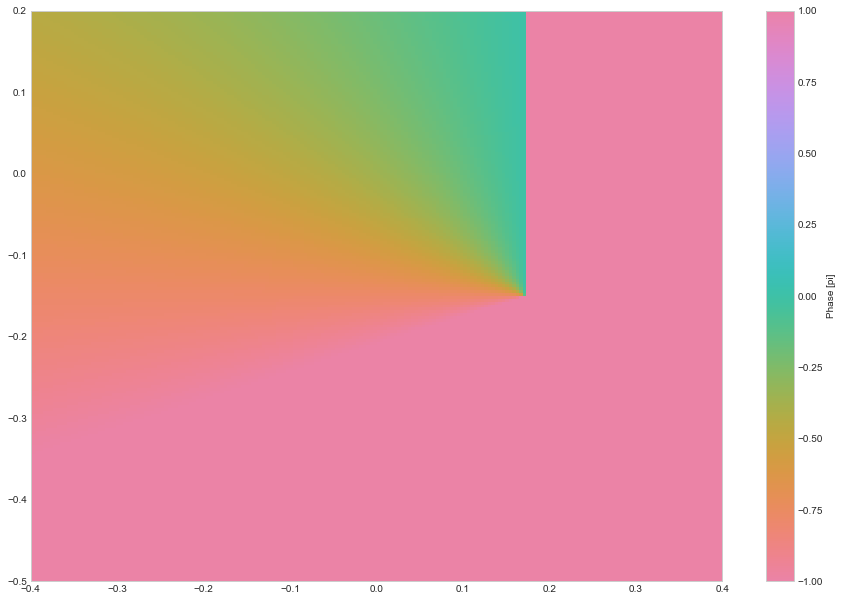

In [47]:
lowlimX = -0.4
uplimX = 0.4
lowlimY = -0.5
uplimY = 0.2
number = 200

x=np.linspace(lowlimX,uplimX,num=number)
y=np.linspace(lowlimY,uplimY,num=number)

def phi(x,y):
    r=np.sqrt(x**2+y**2)
    if x<0:
        res = 2*np.pi -np.arcsin(y/r)
    else:
        res = np.arcsin(y/r)
    return res

def func2(x,y,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    res1 = []
    res2 = []
    for i in x:
        for k in y:
            phase1=0
            phase2=0
            if k <0:
                s= complex(i,k)
                Medi = amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)
                phase1 = phi(Medi.real,Medi.imag)
            else:
                s= complex(i,k)
                Medi = amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)
                phase2 = phi(Medi.real,Medi.imag)
            num = phase1
            res1.append(num)
        res2.append(res1)
        res1=[]
    return res2


def func_cmath(x,y,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    res1 = []
    res2 = []
    for i in x:
        for k in y:
            s= complex(i,k)
            num =cmath.phase(amp(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b))
            res1.append(num)
        res2.append(res1)
        res1=[]
    return res2


#fig2 = go.FigureWidget(data =
#    go.Heatmap(z=func2(x,y,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b),x=x, y=y,
#               zsmooth = 'best', zmin = -np.pi,zmax =np.pi,colorbar=dict(title='Phase(A)',titleside = 'top',tickvals=[-np.pi,-np.pi/2,0,np.pi/2,np.pi], ticktext = ["-\u03c0","-\u03c0 /2","0","\u03c0 /2","\u03c0"]), colorscale = 'mygbm'
#                ))
#fig2.layout.autosize = False
#fig2.layout.width=650
#fig2.layout.height = 650

#display(fig2)

color_circle = np.ones((256,3))*60
color_circle[:,1] = np.ones((256))*45
color_circle[:,2] = np.arange(0,360,360/256)
color_circle_rgb = cspace_convert(color_circle, "JCh","sRGB1")

cm = col.ListedColormap(color_circle_rgb)


z = func_cmath(x,y,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b)

fig = plt.figure()
plt.grid(False)
ax = plt.gca()
fig.set_size_inches(15.5, 10.5)
pmesh = ax.pcolormesh(x, y, z, 
    cmap = cm, vmin=-1, vmax=1)
plt.axis([x.min(), x.max(), y.min(), y.max()])
cbar = fig.colorbar(pmesh)
cbar.ax.set_ylabel('Phase [pi]')
plt.show()

In [48]:
print('start heat:'+datetime.now().strftime("(%H:%M:%S.%f)"))

#function to calculate the imaginary part of the amplitude using a set of complex numbers
#the input are two lists of numbers (x contains the real parts and y the imaginary parts of the computed complex numbers), the result is a 2D-matrix:
def func_test(x,y,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b):
    res1 = []
    res2 = []
    for i in x:
        for k in y:
            s= complex(i,k)
            num = cmath.phase(np.sqrt(s))
            res1.append(num)
        res2.append(res1)
        res1=[]
    return res2

#calculate upper and lower bounds for the x and y
lowX=-1
upX=1
lowY =-1
upY = 1

number1 = 200

#compute a set of data points, using more datapoints around the Breit-Wigner mass, where the pole is expected, in order to improve the performance of the programm:
x=np.linspace(lowX,upX,num=number1)
y=np.linspace(lowY,upY,num=number1)

figTest = go.FigureWidget(data =
    go.Heatmap(z=func_test(x,y,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b),x=x, y=y,
               zsmooth = 'best',zmin = -np.pi,zmax =np.pi, colorbar=dict(title='Im(s^(1/2))',titleside = 'top',tickvals=[-np.pi,-np.pi/2,0,np.pi/2,np.pi], ticktext = ["-\u03c0","-\u03c0 /2","0","\u03c0 /2","\u03c0"]), colorscale = 'mygbm'
                ))

#[(np.pi,"blue"), (1,"red")]colorscale= px.colors.cyclical.swatches.Edge
#set the layout of the plot:
figTest.layout.title.text = 'Heatmap of the square root function in the complex plane'
figTest.layout.xaxis.title = r'$\Re{(s)}$'
figTest.layout.yaxis.title = r'$\Im{(s)}$'
figTest.layout.xaxis.title.font.size = 18
figTest.layout.yaxis.title.font.size = 18
figTest.layout.autosize = False
figTest.layout.width=650
figTest.layout.height = 650

#initialise all widgets in an interact enviroment and define an update function, that is called as soon as a parameter is changed using one of the widgets and immediately changes the plot:
def update(momentum_a = la, BreitWignerMass = mass, Alpha = alpha, Mass1 = m1a, Mass2 = m2a, Coupling_a = gFaka, momentum_b_0 = lb[0], coupling_b_0 = gFakb[0], mass1_b_0=m1b[0],mass2_b_0=m2b[0]):
    with fig.batch_update():

        lowX=-1
        upX=1
        lowY =-1
        upY = 1
        figTest.data[0].z = func_test(x,y,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a,[momentum_b_0],[coupling_b_0],[mass1_b_0],[mass2_b_0])
        
w2=interactive(update,
          momentum_a = widgets.IntSlider(value=la,min=0,max=2,step=1,description=r'l$_a$:'),
          BreitWignerMass = widgets.IntSlider(min=0.0,max=2.0*mass,step=1.0,value=mass,description=r'M$_{\text{BW}}$:'),
          Alpha = widgets.IntSlider(value=alpha,min=alpha-2, max=alpha + 2,step=1,description=r'$\alpha$:'),
          Mass1 = widgets.IntSlider(value=m1a,min=0,max=2*m1a,step=1,description=r'm$_1^a$:'),
          Mass2 =  widgets.IntSlider(value=m2a,min=0,max=2*m2a,step=1,description=r'm$_2^a$:'),
          Coupling_a = widgets.FloatSlider(value=gFaka,min=0,max=10000.0,step=0.1,description=r'g$_a$'),    
          momentum_b_0 = widgets.IntSlider(value=lb[0],min=0,max=2,step=1,description=r'l$_b$'),
          coupling_b_0 = widgets.FloatSlider(value=gFakb[0],min=0.0,max=1.0,step=0.1,description=r'g$_b$:'),
          mass1_b_0 = widgets.IntSlider(value=m1b[0],min=0.0,max=2*m1b[0],step=1,description=r'm$_1^b$:'),
          mass2_b_0 = widgets.IntSlider(value=m2b[0],min=0.0,max=2*m2b[0],step=1,description=r'm$_2^b$:'),
          Imag = widgets.Dropdown(value=imag,options=[0,1,2,3,4,5,6,7,8],description='imaginary part:',style=style))

box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')
Hbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


h1 = HBox([w2.children[0],w2.children[1]], layout=Hbox_layout)
h2 = HBox([w2.children[2],w2.children[3]], layout=Hbox_layout)
hSum_12 = HBox([h1,h2], layout=Hbox_layout)
h3 = HBox([w2.children[4],w2.children[5]], layout=Hbox_layout)
h4 = HBox([w2.children[6],w2.children[7]], layout=Hbox_layout)
hSum_34 = HBox([h3,h4], layout=Hbox_layout)
h5 = HBox([w2.children[8],w2.children[9]], layout=Hbox_layout)
hSum_56 = HBox([h5,w2.children[10]], layout=Hbox_layout)

#creating a large hbox:
HSum_first = HBox([hSum_12,hSum_34], layout=Hbox_layout)
HSum_final = HBox([HSum_first,hSum_56], layout=Hbox_layout)

display(VBox([figTest,HSum_final], layout=box_layout))

start heat:(09:50:48.063948)


    'data': [{'colorbar': {'ticktext': [-π, -π /2, 0, π /2, π],
                …

In [49]:
#keep track of the execution time:
print('end programm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

end programm:(09:50:48.678429)
